# WeatherPy
----

In this example, Python script was utilized to visualize the weather of 500+ cities across the world of varying distance from the equator. 

OBSERVED TRENDS
1.  In this data Max Temp was the most dependent variable to the independent variable Latitude.
2.  Latitude below the equator (Southern Hemisphere) had a positive relationship to Max Temp.  That is as latitude increased, the Max Temp increased.
3.  Latitude above the equator (Northern Hemisphere) had a negative relationship to Max Temp.  That is as latitude increased, the Max Temp decreased.
4.  The other variables; humidity, cloudiness, and wind speed, were not dependent on latitude.


In [1]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())
# Print the city count to confirm sufficient count
print("City Count " + str(len(cities)))
print("Country Count " + str(len(countries)))

# lat_lngs
# cities

City Count 609
Country Count 609


In [3]:
city_weather = pd.DataFrame({"City":cities,
                               "Country":countries,
                               "Max Temperature":"",
                               "Humidity (%)":"",
                               "Cloudiness (%)":"",
                               "Wind Speed (MPH)":"",
                               "Latitude":"",
                               "Longitude":""})
city_weather.head()

,City,Country,Max Temperature,Humidity (%),Cloudiness (%),Wind Speed (MPH),Latitude,Longitude
0,san patricio,MX,,,,,,
1,bredasdorp,ZA,,,,,,
2,kindersley,CA,,,,,,
3,punta arenas,CL,,,,,,
4,faanui,PF,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Variables to keep track of response number
record_num = 1
record_set = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')
for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness (%)'] = response['clouds']['all']
        city_weather.loc[index, 'Humidity (%)'] = response['main']['humidity']
        city_weather.loc[index, 'Latitude'] = response['coord']['lat']
        city_weather.loc[index, 'Longitude'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temperature'] = response['main']['temp_max']
        city_weather.loc[index, 'Wind Speed (MPH)'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(5)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''')


-----------------------------
Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | San Patricio
Processing Record 2 of Set 1 | Bredasdorp
Processing Record 3 of Set 1 | Kindersley
Processing Record 4 of Set 1 | Punta Arenas
Processing Record 5 of Set 1 | Faanui
Processing Record 6 of Set 1 | Saskylakh
Processing Record 7 of Set 1 | Tiarei
Processing Record 8 of Set 1 | Leningradskiy
Processing Record 9 of Set 1 | Jamestown
Processing Record 10 of Set 1 | Lālmohan
City not found....Skipping............
City not found....Skipping............
Processing Record 11 of Set 1 | Tuktoyaktuk
Processing Record 12 of Set 1 | Gualaquiza
Processing Record 13 of Set 1 | Melfi
Processing Record 14 of Set 1 | Broken Hill
Processing Record 15 of Set 1 | Ancud
Processing Record 16 of Set 1 | Ilulissat
Processing Record 17 of Set 1 | Hilo
Processing Record 18 of Set 1 | Qarqīn
Processing Record 19 of Set 1 | Salalah
Processing Record 20 of Set 1 | Port Alfred
Processing 

Processing Record 33 of Set 4 | Kirensk
Processing Record 34 of Set 4 | Bani Walid
Processing Record 35 of Set 4 | Huarmey
City not found....Skipping............
Processing Record 36 of Set 4 | Whitehorse
Processing Record 37 of Set 4 | Egvekinot
Processing Record 38 of Set 4 | Pevek
Processing Record 39 of Set 4 | Lebu
Processing Record 40 of Set 4 | Levelland
Processing Record 41 of Set 4 | Coquimbo
Processing Record 42 of Set 4 | Verāval
Processing Record 43 of Set 4 | Beitbridge
Processing Record 44 of Set 4 | Bastrop
Processing Record 45 of Set 4 | Starotimoshkino
Processing Record 46 of Set 4 | Viking
Processing Record 47 of Set 4 | Saint-Philippe
Processing Record 48 of Set 4 | São João da Barra
Processing Record 49 of Set 4 | Ajdabiya
Processing Record 50 of Set 4 | Giza
City not found....Skipping............
City not found....Skipping............
Processing Record 1 of Set 5 | Adrar
Processing Record 2 of Set 5 | Woodward
Processing Record 3 of Set 5 | Guaíra
Processing Record

City not found....Skipping............
Processing Record 13 of Set 8 | Praia
Processing Record 14 of Set 8 | Lamu
Processing Record 15 of Set 8 | Kavaratti
City not found....Skipping............
Processing Record 16 of Set 8 | Dubova
Processing Record 17 of Set 8 | Pestyaki
Processing Record 18 of Set 8 | Yakeshi
Processing Record 19 of Set 8 | Painesville
Processing Record 20 of Set 8 | Adwa
Processing Record 21 of Set 8 | Kawalu
Processing Record 22 of Set 8 | Porto Walter
Processing Record 23 of Set 8 | Mangaldai
Processing Record 24 of Set 8 | Itarema
Processing Record 25 of Set 8 | Saint Andrews
Processing Record 26 of Set 8 | Kouroussa
Processing Record 27 of Set 8 | Poya
Processing Record 28 of Set 8 | Gambēla
Processing Record 29 of Set 8 | Selenicë
Processing Record 30 of Set 8 | Osa
Processing Record 31 of Set 8 | Bitung
City not found....Skipping............
Processing Record 32 of Set 8 | Bilibino
Processing Record 33 of Set 8 | Hvide Sande
Processing Record 34 of Set 8 | N

Processing Record 35 of Set 11 | Halifax
Processing Record 36 of Set 11 | Misawa
Processing Record 37 of Set 11 | Severnyy
Processing Record 38 of Set 11 | Paracuru
Processing Record 39 of Set 11 | Kyabé
City not found....Skipping............
City not found....Skipping............
Processing Record 40 of Set 11 | Hambantota
Processing Record 41 of Set 11 | Ous

-----------------------------
Data Retrival Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Clean dataframe to remove cities that were not found
city_weather['Max Temperature'] = city_weather['Max Temperature'].replace('', np.nan)
city_weather = city_weather.dropna()

#Save dataframe
city_weather.to_csv("Output_Data/CityWeatherData.csv", index=False, header=True)

#Preview the dataframe
city_weather.count()
# city_weather.head()

City                541
Country             541
Max Temperature     541
Humidity (%)        541
Cloudiness (%)      541
Wind Speed (MPH)    541
Latitude            541
Longitude           541
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
over100humidity = city_weather.loc[(city_weather["Humidity (%)"]>100),:]
over100humidity

,City,Country,Max Temperature,Humidity (%),Cloudiness (%),Wind Speed (MPH),Latitude,Longitude


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

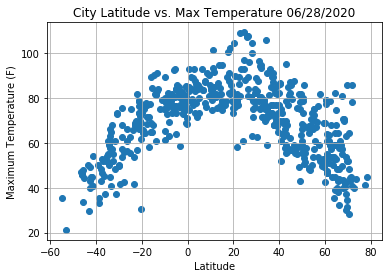

In [71]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Latitude"], city_weather["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Data/city_latitude_maxtemp.png")

# Show plot
plt.show()

In this scatter plot each dot represents a temperature (y-axis) at a specific latitude (x-axis).  As can be seen, the northern hemisphere temperatures go down with latitude, as the latitude rises above the equator (0 on the x axis). The southern hemisphere temperatures go down with latitude, as the latitude falls below the equator (0 on the x axis).   

## Latitude vs. Humidity Plot

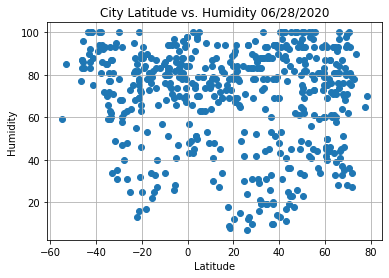

In [72]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Latitude"], city_weather["Humidity (%)"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Data/city_latitude_hum.png")

# Show plot
plt.show()

In this scatter plot each dot represents humidity in percent (y-axis) at a specific latitude (x-axis). There does not appear to be a significant relationship between humidity and latitude.   

## Latitude vs. Cloudiness Plot

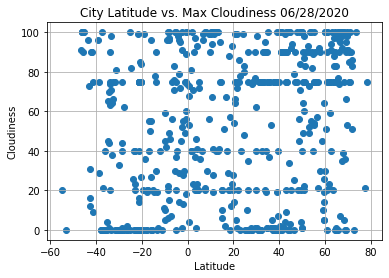

In [73]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Latitude"], city_weather["Cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Data/city_latitude_cloud.png")

# Show plot
plt.show()

In this scatter plot each dot represents cloudiness in percent (y-axis) at a specific latitude (x-axis). There does not appear to be a significant relationship between cloudiness and latitude.   

## Latitude vs. Wind Speed Plot

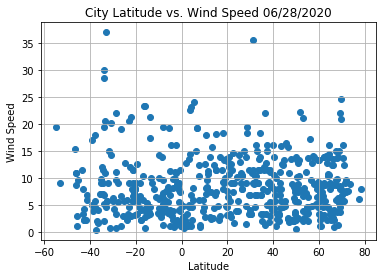

In [74]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Latitude"], city_weather["Wind Speed (MPH)"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output_Data/city_latitude_wind.png")

# Show plot
plt.show()

In this scatter plot each dot represents windspeed in mph (y-axis) at a specific latitude (x-axis). There does not appear to be a significant relationship between windspeed and latitude.   

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots

In [12]:
# Create Northern and Southern Hemisphere DataFrames

north_hemisphere = city_weather.loc[city_weather["Latitude"] > 0]
south_hemisphere = city_weather.loc[city_weather["Latitude"] < 0]

# north_hemisphere.to_csv("output_data/northhem.csv", index = False)
# south_hemisphere.to_csv("output_data/southhem.csv", index = False)

south_hemisphere.astype({'Latitude': 'float'}).dtypes
north_hemisphere.astype({'Latitude': 'float'}).dtypes


City                 object
Country              object
Max Temperature     float64
Humidity (%)         object
Cloudiness (%)       object
Wind Speed (MPH)     object
Latitude            float64
Longitude            object
dtype: object

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [13]:
# Hemisphere Variables

nhtemp = north_hemisphere["Max Temperature"]
shtemp = south_hemisphere["Max Temperature"]
nhhum = north_hemisphere["Humidity (%)"]
shhum = south_hemisphere["Humidity (%)"]
nhcloud = north_hemisphere["Cloudiness (%)"]
shcloud = south_hemisphere["Cloudiness (%)"]
nhwind = north_hemisphere["Wind Speed (MPH)"]
shwind = south_hemisphere["Wind Speed (MPH)"]
nhlat = north_hemisphere["Latitude"]
shlat = south_hemisphere["Latitude"]




The r-squared of latitude and Max Temperature is 0.4949698017925728


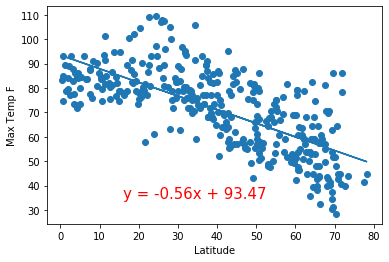

In [63]:
slope, intercept, rvalue, pvalue, stderr = linregress(nhlat.astype(float),nhtemp.astype(float))
regress_values = slope * nhlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nhlat,nhtemp)
plt.plot(nhlat,regress_values)
plt.annotate(line_eq,(16,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp F')
plt.savefig("Output_Data/nhem_lat_temp.png")

print("The r-squared of latitude and Max Temperature is " + str(rvalue**2))
           

In this scatter plot each dot represents max temperature in fahrenheit (y-axis) at a specific latitude in the northern hemisphere (x-axis is greater than 0). As latitude increases, max temperature decreases.  This is very logical as the sun is closest to the equator, and as the latitude moves away from the equator the temperature should get cooler. The r-squared value is 50%.  This shows that latitude can explain 50% of the variation in max temp.    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared of latitude and Max Temperature is 0.6482927635402123


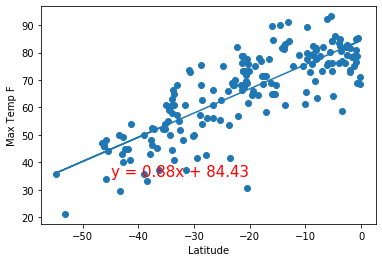

In [64]:
slope, intercept, rvalue, pvalue, stderr = linregress(shlat.astype(float),shtemp.astype(float))
regress_values = slope * shlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(shlat,shtemp)
plt.plot(shlat,regress_values)
plt.annotate(line_eq,(-45,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp F')
plt.savefig("Output_Data/shem_lat_temp.png")


print("The r-squared of latitude and Max Temperature is " + str(rvalue**2))
           

In this scatter plot each dot represents max temperature in fahrenheit (y-axis) at a specific latitude in the southern hemisphere (x-axis is less than 0). As latitude decreases, max temperature decreases.  This is very logical as the sun is closest to the equator, and as the latitude moves away from the equator the temperature should get cooler.  The r-squared value is 65%.  This shows that latitude can explain 65% of the variation in max temp.  

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared of latitude and humidity is 0.0013609336019896493


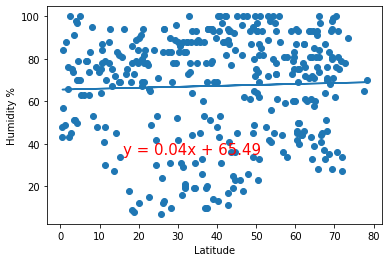

In [65]:
slope, intercept, rvalue, pvalue, stderr = linregress(nhlat.astype(float),nhhum.astype(float))
regress_values = slope * nhlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nhlat,nhhum)
plt.plot(nhlat,regress_values)
plt.annotate(line_eq,(16,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.savefig("Output_Data/nhem_lat_hum.png")

print("The r-squared of latitude and humidity is " + str(rvalue**2))

In this scatter plot each dot represents humidity in percent (y-axis) at a specific latitude in the northern hemisphere (x-axis is greater than 0). There does not seem to be a significant relationship between humidity and latitude.  This is proven by the low r-squared value. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared of latitude and humidity is 0.00456859405449608


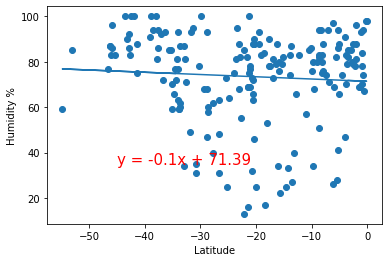

In [66]:
slope, intercept, rvalue, pvalue, stderr = linregress(shlat.astype(float),shhum.astype(float))
regress_values = slope * shlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(shlat,shhum)
plt.plot(shlat,regress_values)
plt.annotate(line_eq,(-45,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.savefig("Output_Data/shem_lat_hum.png")


print("The r-squared of latitude and humidity is " + str(rvalue**2))

In this scatter plot each dot represents humidity in percent (y-axis) at a specific latitude in the southern hemisphere (x-axis is less than 0). There does not seem to be a significant relationship between humidity and latitude.  This is proven by the low r-squared value. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared of latitude and cloud cover is 0.026599960874726457


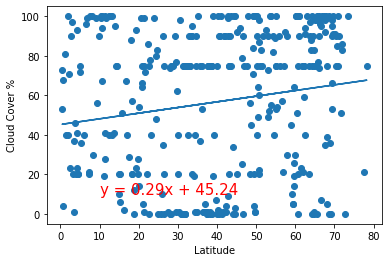

In [67]:
slope, intercept, rvalue, pvalue, stderr = linregress(nhlat.astype(float),nhcloud.astype(float))
regress_values = slope * nhlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nhlat,nhcloud)
plt.plot(nhlat,regress_values)
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover %')
plt.savefig("Output_Data/nhem_lat_cloud.png")


print("The r-squared of latitude and cloud cover is " + str(rvalue**2))


In this scatter plot each dot represents cloud cover in percent (y-axis) at a specific latitude in the northern hemisphere (x-axis is greater than 0). There does not seem to be a significant relationship between cloud cover and latitude.  This is proven by the low r-squared value. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared of latitude and cloud cover is 0.0020922883947303407


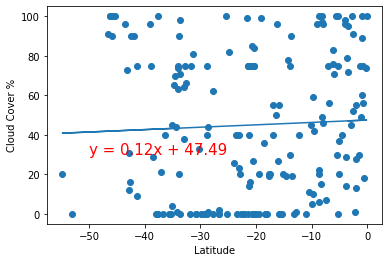

In [68]:
slope, intercept, rvalue, pvalue, stderr = linregress(shlat.astype(float),shcloud.astype(float))
regress_values = slope * shlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(shlat,shcloud)
plt.plot(shlat,regress_values)
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloud Cover %')
plt.savefig("Output_Data/shem_lat_cloud.png")


print("The r-squared of latitude and cloud cover is " + str(rvalue**2))

In this scatter plot each dot represents cloud cover in percent (y-axis) at a specific latitude in the southern hemisphere (x-axis is less than 0). There does not seem to be a significant relationship between cloud cover and latitude.  This is proven by the low r-squared value. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared of latitude and wind speed is 0.00016819318564063852


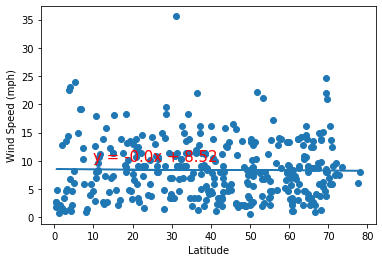

In [69]:
slope, intercept, rvalue, pvalue, stderr = linregress(nhlat.astype(float),nhwind.astype(float))
regress_values = slope * nhlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(nhlat,nhwind)
plt.plot(nhlat,regress_values)
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Output_Data/nhem_lat_wind.png")


print("The r-squared of latitude and wind speed is " + str(rvalue**2))


In this scatter plot each dot represents wind speed in mph (y-axis) at a specific latitude in the northern hemisphere (x-axis is greater than 0). There does not seem to be a significant relationship between wind speed and latitude.  This is proven by the low r-squared value. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared of latitude and wind speed is 0.021875907652177163


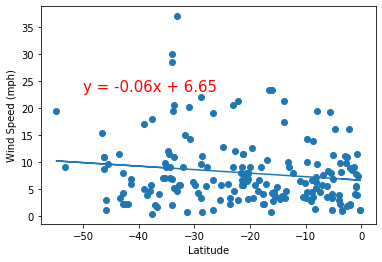

In [70]:
slope, intercept, rvalue, pvalue, stderr = linregress(shlat.astype(float),shwind.astype(float))
regress_values = slope * shlat + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(shlat,shwind)
plt.plot(shlat,regress_values)
plt.annotate(line_eq,(-50,23),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig("Output_Data/shem_lat_wind.png")


print("The r-squared of latitude and wind speed is " + str(rvalue**2))

In this scatter plot each dot represents wind speed in mph (y-axis) at a specific latitude in the southern hemisphere (x-axis is greater than 0). There does not seem to be a significant relationship between wind speed and latitude.  This is proven by the low r-squared value. 